## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [2]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [3]:
def estimate_w(X,y,lambda_reg):
    temp=np.dot(X.T,y)
    I=np.eye(X.shape[1])
    w=np.dot(np.linalg.inv(np.dot(X.T,X))+lambda_reg*I,temp)
    return w

#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{17} = 754.55$

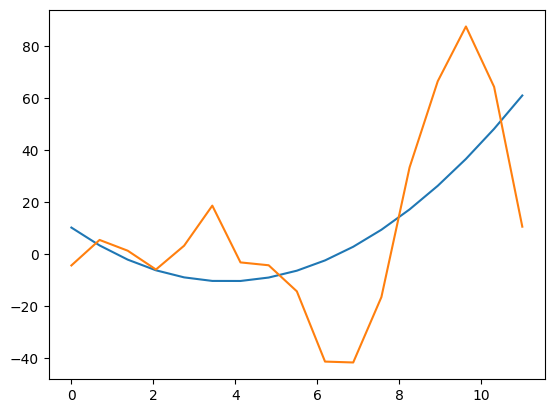

In [4]:
n = 3
lambda_reg = 0.0
X=np.column_stack([x**i for i in range(n+1)])
w=estimate_w(X,y,lambda_reg)
estimate_y=np.dot(X,w)
plt.plot(x,estimate_y)
plt.plot(x,y)
plt.show()


#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [5]:
n_val=[]
lambda_val=[]
for i in range(1,20):
    n_val.append(i)
for i in range(10):
    lambda_val.append(i*0.1)

min_mse=float('inf')
best_n=0
best_lam=0

for n in n_val:
    for lam in lambda_val:
        X=np.column_stack([x**i for i in range(n+1)])
        w=estimate_w(X,y,lam)
        estimate_y=np.dot(X,w)
        mse=np.mean((y-estimate_y)**2)
        if mse<min_mse:
            min_mse=mse
            best_n=n
            best_lam=lam
print("Best MSE:",min_mse)
print("Best n:",best_n)
print("Best lambda:",best_lam)

Best MSE: 21.238330824509255
Best n: 10
Best lambda: 0.0


#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

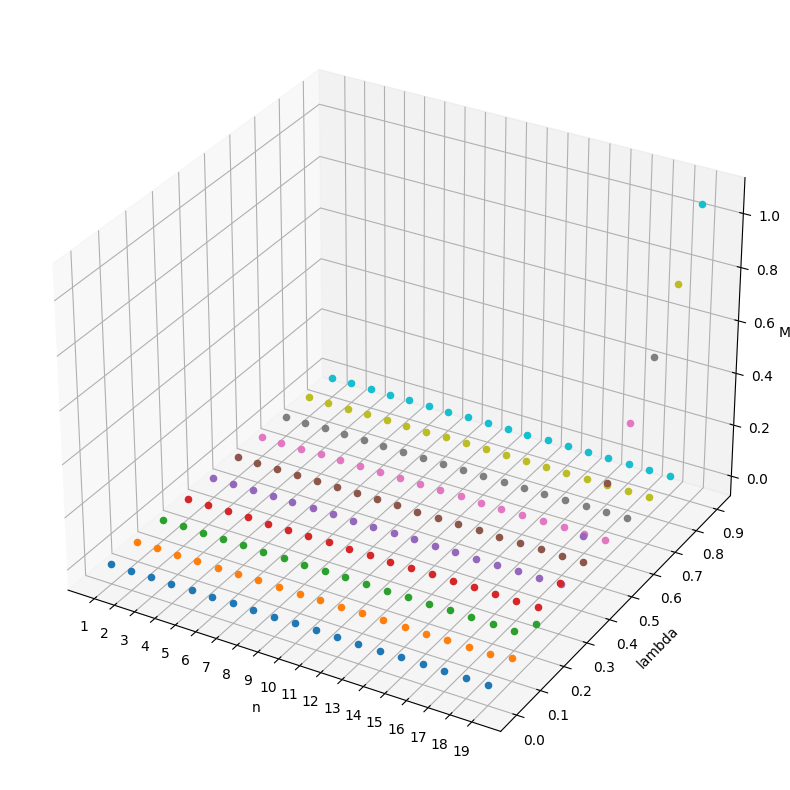

In [6]:
from matplotlib.pyplot import MultipleLocator
fig=plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.1)
am=plt.gca()
am.xaxis.set_major_locator(x_major_locator)
am.yaxis.set_major_locator(y_major_locator)
for n in n_val:
    for lam in lambda_val:
        X=np.column_stack([x**i for i in range(n+1)])
        w=estimate_w(X,y,lam)
        estimate_y=np.dot(X,w)
        mse=np.mean((y-estimate_y)**2)
        ax.scatter3D(n,lam,mse)
ax.set_xlabel('n')
ax.set_ylabel('lambda')
ax.set_zlabel('MSE')
plt.show()

#### 5. (1 point) 

(1) Define the function $f$ that you found.


In [24]:
def f(x_input):
    X=np.column_stack([x**i for i in range(11)])
    w=estimate_w(X,y,0.0)
    X_input=np.column_stack([x_input**i for i in range(11)])
    estimate_Y=np.dot(X_input,w)
    return estimate_Y

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

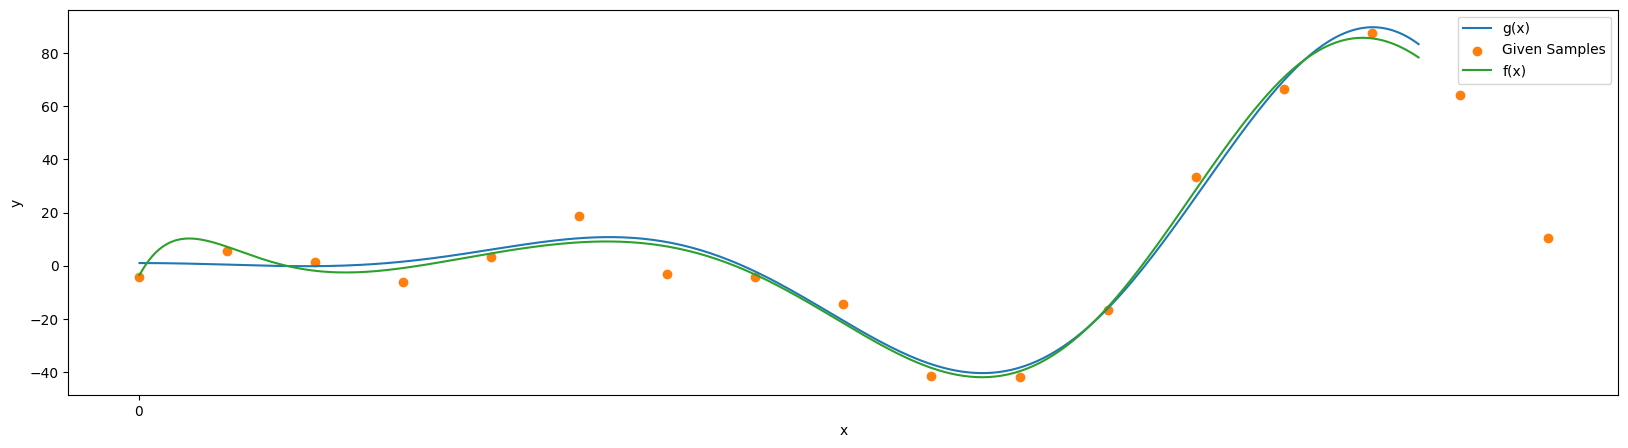

<Figure size 640x480 with 0 Axes>

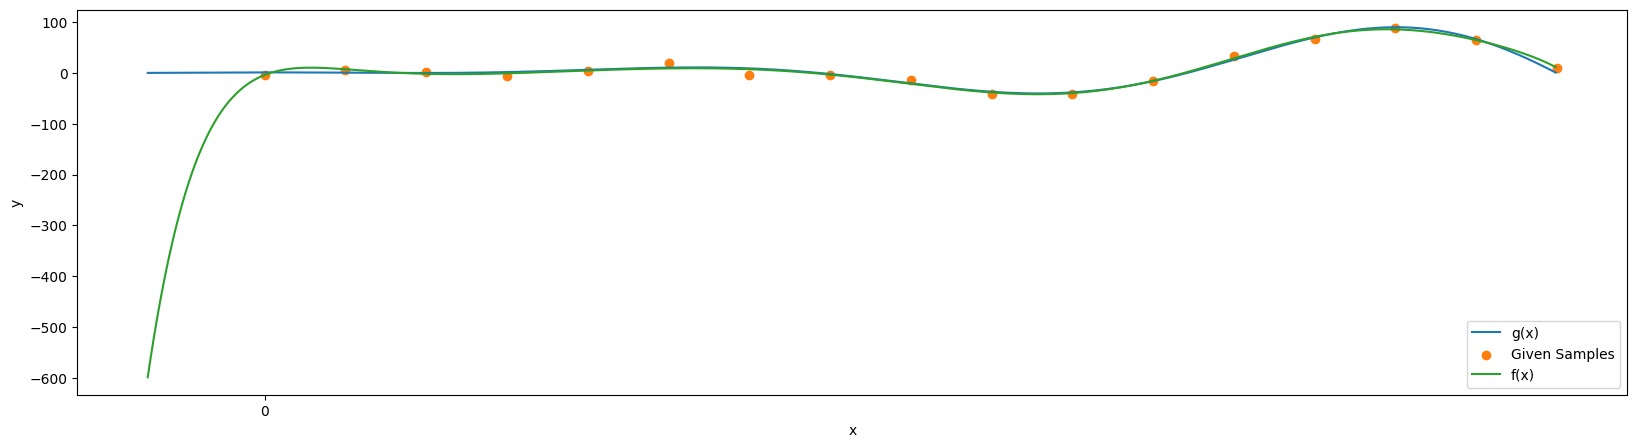

<Figure size 640x480 with 0 Axes>

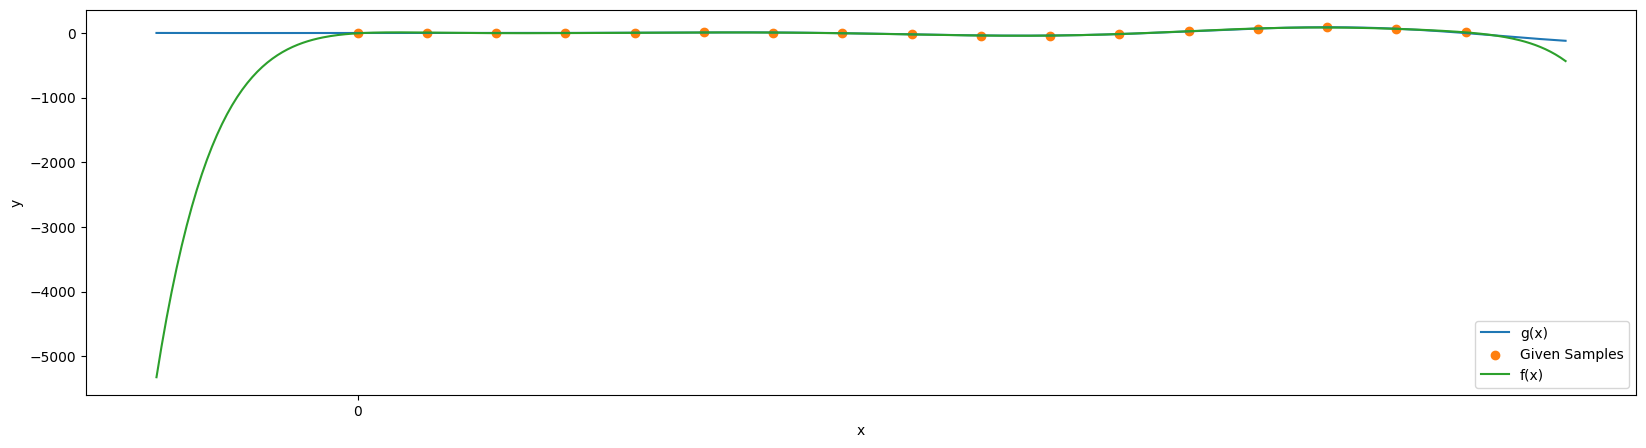

In [34]:
# load
import pickle as pkl
with open('ground truth function', 'rb') as read_file:
    x_real_g, y_real_g = pkl.load(read_file)
    x_arr=np.array(x_real_g)
        
    i=0
    j=10
    while(i>-3):
        fig=plt.figure(figsize=(20,5))
        x_major_locator=MultipleLocator(1)
        y_major_locator=MultipleLocator(20)
        am2=plt.gca()
        am2.xaxis.set_major_locator(x_major_locator)
        am2.xaxis.set_major_locator(y_major_locator)

        plt.plot(x_arr[(x_arr>=i)&(x_arr<=j)],y_real_g[(x_arr>=i)&(x_arr<=j)],color='C0', label='g(x)')
        plt.scatter(x,y,color='C1', label='Given Samples')
        plt.plot(x_arr[(x_arr>=i)&(x_arr<=j)],f(x_arr[(x_arr>=i)&(x_arr<=j)]),color='C2', label='f(x)')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
        i-=1
        j+=1
        if(i!=-3):
            plt.clf()

    read_file.close()



comments:
- The model fits well when $x\in [0,11]$.
- However, when $x<0$ or $x>11$, the error is much bigger.